In [1]:
### ATOC5860 - synthetic data_with_filters
### Originally from Libby Barnes (Colorado State University)
### Additional code/commenting from Jennifer Kay and Elizabeth Maroon (University of Colorado) 
### Last updated March 29, 2022

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.signal as sig
from matplotlib.gridspec import GridSpec
import timeit
import scipy.io as sio

0.203125


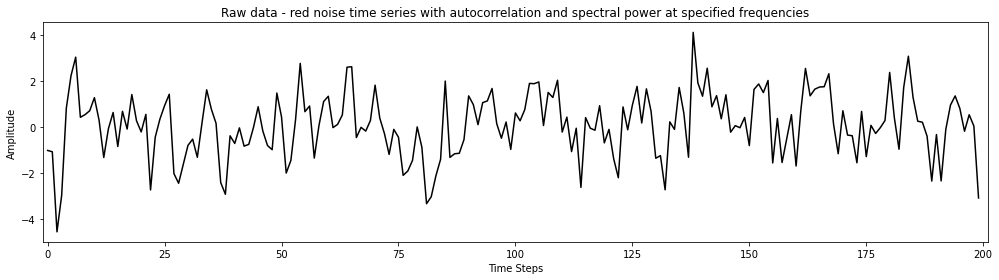

In [2]:
# generate an anomaly red noise time series with oscillations
n = 200              ## number of time steps
alpha = 0.5          ## autocorrelation
freq = 52./256.      ## oscillation frequency
freq2 = 100./256     ## oscillation frequency 2
print(freq)
factor = np.sqrt(1.-alpha*alpha)
x = np.zeros((n,))
pnum = 0
x[0] = x[-1]*alpha + factor*np.random.randn()
for j in np.arange(1,n):
    x[j] = x[j-1]*alpha + factor*np.random.randn()+1.0*np.cos(2.0*np.pi*(1.-0.01*np.random.randn())*freq*j) + \
    0.75*np.cos(2.*np.pi*(1.-.001*np.random.randn())*freq2*j-np.pi/4.) 
# remove the mean - calculate the anomaly    
xa = x - np.mean(x) 

f=plt.figure(figsize=(14,4))
plt.plot(x,'-k',linewidth = 1.5, label = 'raw input');
plt.xlim(-1,np.size(x)+1);
plt.title('Raw data - red noise time series with autocorrelation and spectral power at specified frequencies');
plt.xlabel('Time Steps');
plt.ylabel('Amplitude');
f.tight_layout()

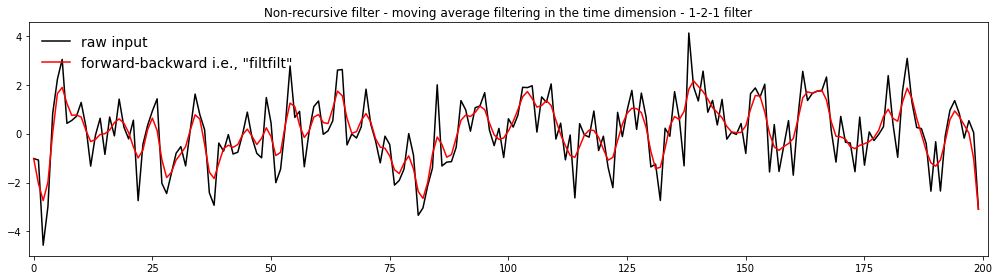

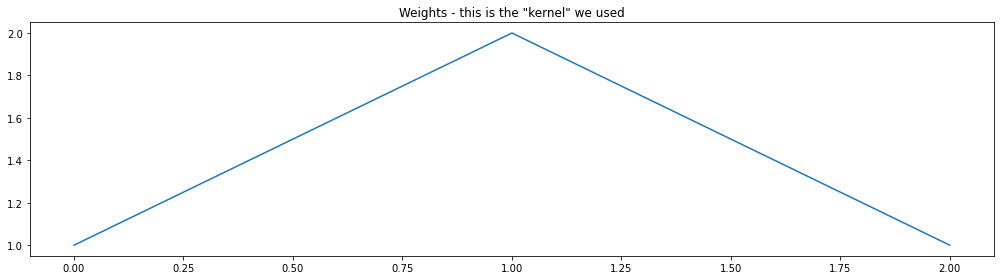

In [3]:
### Apply a non-recursive filter in the time dimension.  Note: this filter is also called a moving average filter
### Try multiple non-recursive filter types

### Type #1: Apply a 1-2-1 filter (filtering in the time dimension, non-recursive moving average filter)
f=plt.figure(figsize=(14,4))
plt.plot(x,'-k',linewidth = 1.5, label = 'raw input');
b = (1,2,1)
y = sig.filtfilt(b,np.sum(b),x) ## applying the moving average to the data  (numerator, denomenator, data)
plt.plot(y,'-r', label = 'forward-backward i.e., "filtfilt"')
plt.xlim(-1,np.size(x)+1)
plt.legend(frameon = False, fontsize = 14,loc='upper left')
plt.title('Non-recursive filter - moving average filtering in the time dimension - 1-2-1 filter')
f.tight_layout()

f=plt.figure(figsize=(14,4))
plt.plot(b);
plt.title('Weights - this is the "kernel" we used')
f.tight_layout()

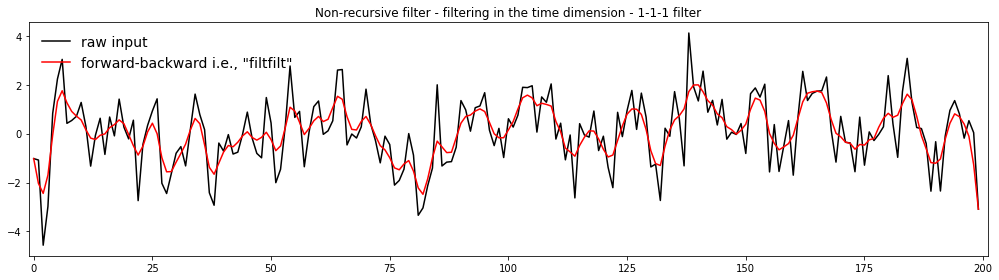

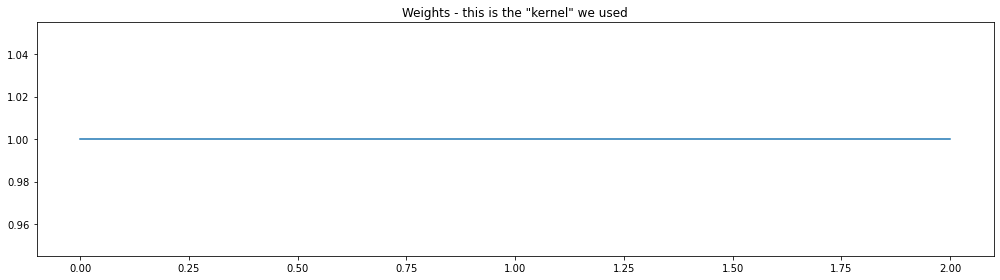

In [4]:
### Type #2: Apply a 1-1-1 filter, Another example of a non-recursive moving average filter in the time dimension
f=plt.figure(figsize=(14,4))
plt.plot(x,'-k',linewidth = 1.5, label = 'raw input');
b = (1,1,1)
y = sig.filtfilt(b,np.sum(b),x) ## applying the moving average to the data  (numerator, denomenator, data)
plt.plot(y,'-r', label = 'forward-backward i.e., "filtfilt"')
plt.xlim(-1,np.size(x)+1)
plt.legend(frameon = False, fontsize = 14,loc='upper left')
plt.title('Non-recursive filter - filtering in the time dimension - 1-1-1 filter')
f.tight_layout()

f=plt.figure(figsize=(14,4))
plt.plot(b);
plt.title('Weights - this is the "kernel" we used')
f.tight_layout()

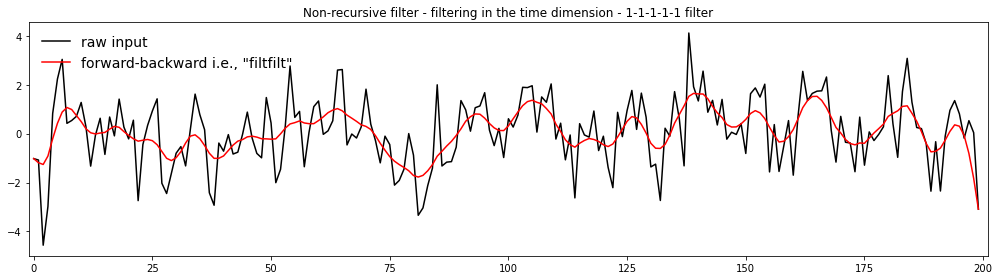

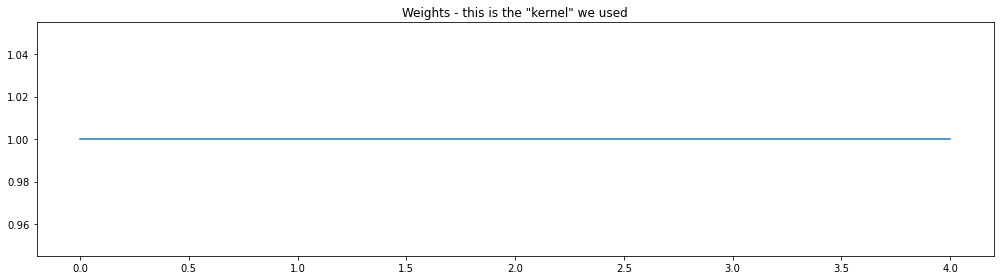

In [5]:
### Type #3: Apply a 1-1-1-1-1 filter... yet another example of a non-recursive moving average filter in the time dimension
f=plt.figure(figsize=(14,4))
plt.plot(x,'-k',linewidth = 1.5, label = 'raw input');
b = (1,1,1,1,1)
y = sig.filtfilt(b,np.sum(b),x) ## applying the moving average to the data  (numerator, denomenator, data)
plt.plot(y,'-r', label = 'forward-backward i.e., "filtfilt"')
plt.xlim(-1,np.size(x)+1)
plt.legend(frameon = False, fontsize = 14,loc='upper left')
plt.title('Non-recursive filter - filtering in the time dimension - 1-1-1-1-1 filter')
f.tight_layout()

f=plt.figure(figsize=(14,4))
plt.plot(b);
plt.title('Weights - this is the "kernel" we used')
f.tight_layout()

oscillation frequency synthetic data (per timestep): 0.203125
frequency cutoff (per timestep): 0.09090909090909091


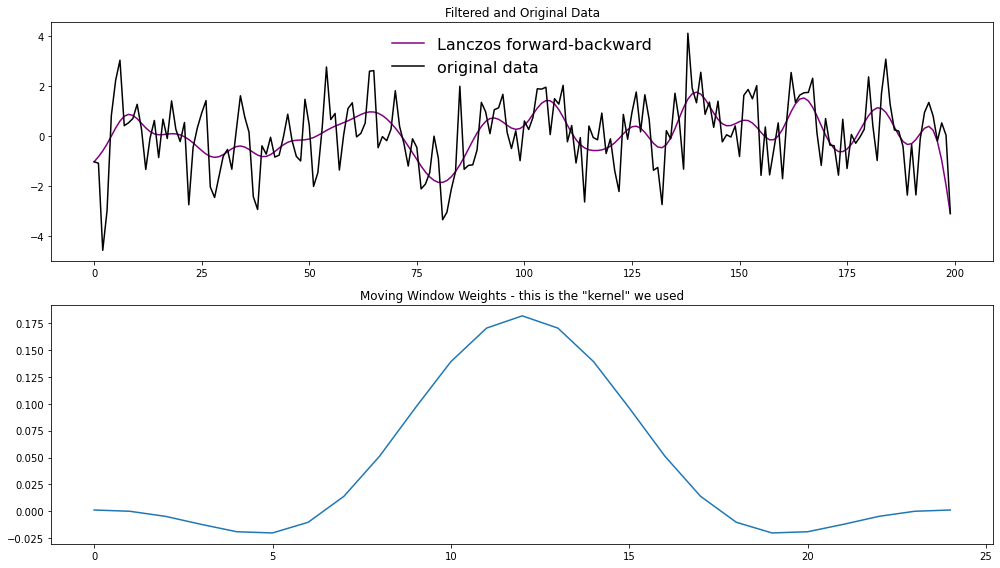

In [6]:
### Type #4 -- Lanczos Filter (non-recursive)
### Let's apply a very standard non-recursive filter called the Lanczos Filter in the time dimension

### Function to make window for Lanczos Filter
def low_pass_weights(window, cutoff):
    """Calculate weights for a low pass Lanczos filter.
    Args:
    window: int
        The length of the filter window in time steps
    cutoff: float
        The cutoff frequency in inverse time steps. 
        (e.g., for data collected every hour, frequency units are per hour)
    """
    order = ((window - 1) // 2 ) + 1
    nwts = 2 * order + 1
    w = np.zeros([nwts])
    n = nwts // 2
    w[n] = 2 * cutoff
    k = np.arange(1., n)
    sigma = np.sin(np.pi * k / n) * n / (np.pi * k)
    firstfactor = np.sin(2. * np.pi * cutoff * k) / (np.pi * k) 
    w[n-1:0:-1] = firstfactor * sigma
    w[n+1:-1] = firstfactor * sigma    
    return w[1:-1]

# specify the window length for filters
window = 25 ## (default 25) 
cutoff = 1. / 11. ## (default 1./11.)
wgts24 = low_pass_weights(window, cutoff)
print('oscillation frequency synthetic data (per timestep): '+str(freq))
print('frequency cutoff (per timestep): '+str(cutoff))

f=plt.figure(figsize=(14,8))
gs=GridSpec(2,1)
fig=plt.subplot(gs[0,0])
y = sig.filtfilt(wgts24,np.sum(wgts24),x)
plt.plot(y, color = 'purple', label = 'Lanczos forward-backward');
plt.plot(x,'-k',linewidth = 1.5, label = 'original data');
plt.title('Filtered and Original Data')
plt.legend(frameon = False, fontsize = 16);
fig=plt.subplot(gs[1,0])
plt.plot(wgts24);
plt.title('Moving Window Weights - this is the "kernel" we used')
f.tight_layout()

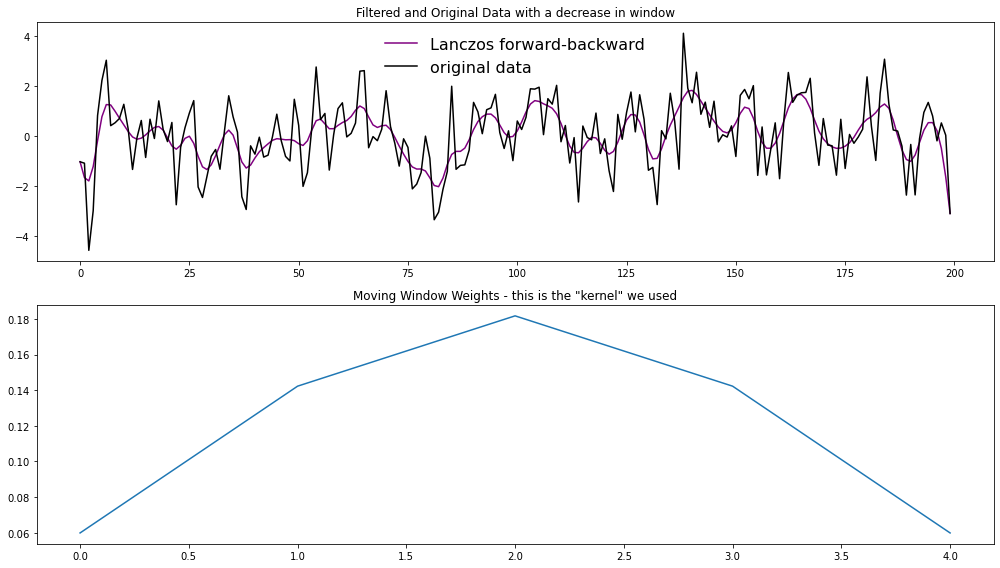

In [7]:
# NOW try changing the window length for filters
window = 5 ## if you decrease window (5), you get less smoothing.  if you increase window (50), you get more smoothing.  
cutoff = 1. / 11. ## (default 1./11.)
wgts24 = low_pass_weights(window, cutoff)

f=plt.figure(figsize=(14,8))
gs=GridSpec(2,1)
fig=plt.subplot(gs[0,0])
y = sig.filtfilt(wgts24,np.sum(wgts24),x)
plt.plot(y, color = 'purple', label = 'Lanczos forward-backward');
plt.plot(x,'-k',linewidth = 1.5, label = 'original data');
plt.title('Filtered and Original Data with a decrease in window')
plt.legend(frameon = False, fontsize = 16);
fig=plt.subplot(gs[1,0])
plt.plot(wgts24);
plt.title('Moving Window Weights - this is the "kernel" we used')
f.tight_layout()

oscillation frequency synthetic data: 0.203125
frequency cutoff: 0.11


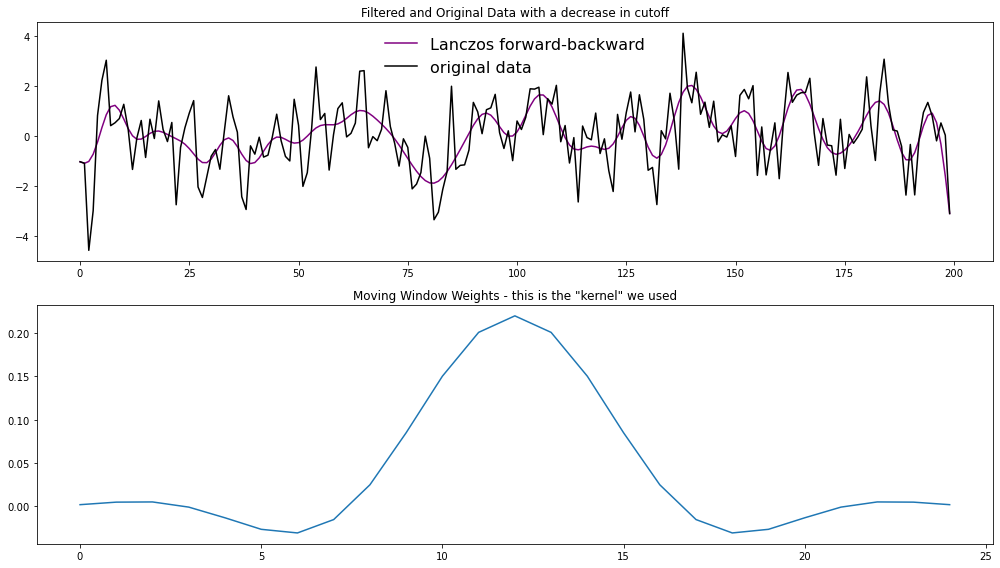

In [8]:
# NOW try changing the window length for filters
window = 25 ## default 25
cutoff = 11. / 100. ## if you increase cutoff, weights concentrated in the middle of the window
                    ## if you decrease cutoff, more weight concentrated at the end of the window
wgts24 = low_pass_weights(window, cutoff)

print('oscillation frequency synthetic data: '+str(freq))
print('frequency cutoff: '+str(cutoff))

f=plt.figure(figsize=(14,8))
gs=GridSpec(2,1)
fig=plt.subplot(gs[0,0])
y = sig.filtfilt(wgts24,np.sum(wgts24),x)
plt.plot(y, color = 'purple', label = 'Lanczos forward-backward');
plt.plot(x,'-k',linewidth = 1.5, label = 'original data');
plt.title('Filtered and Original Data with a decrease in cutoff')
plt.legend(frameon = False, fontsize = 16);
fig=plt.subplot(gs[1,0])
plt.plot(wgts24);
plt.title('Moving Window Weights - this is the "kernel" we used')
f.tight_layout()

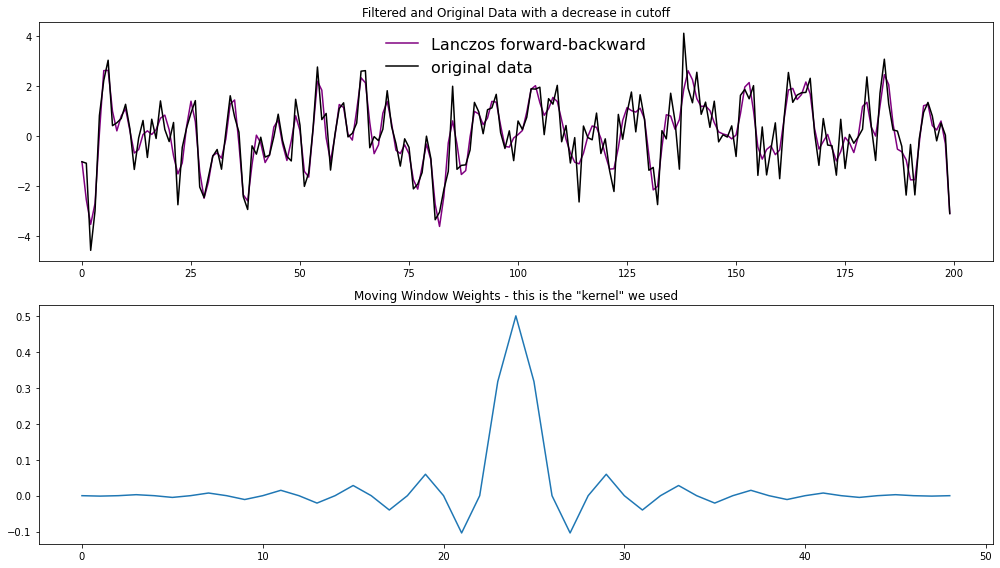

In [9]:
## NOW try changing the window length for filters at different frequencies
### With a lower cutoff frequency = the window length has a bigger influence on the amount of smoothing

window = 50 ## if you decrease the window, you get less smoothing.
cutoff = 25. / 100. ## if you increase cutoff, weights concentrated in the middle of the window
wgts24 = low_pass_weights(window, cutoff)

f=plt.figure(figsize=(14,8))
gs=GridSpec(2,1)
fig=plt.subplot(gs[0,0])
y = sig.filtfilt(wgts24,np.sum(wgts24),x)
plt.plot(y, color = 'purple', label = 'Lanczos forward-backward');
plt.plot(x,'-k',linewidth = 1.5, label = 'original data');
plt.title('Filtered and Original Data with a decrease in cutoff')
plt.legend(frameon = False, fontsize = 16);
fig=plt.subplot(gs[1,0])
plt.plot(wgts24);
plt.title('Moving Window Weights - this is the "kernel" we used')
f.tight_layout()

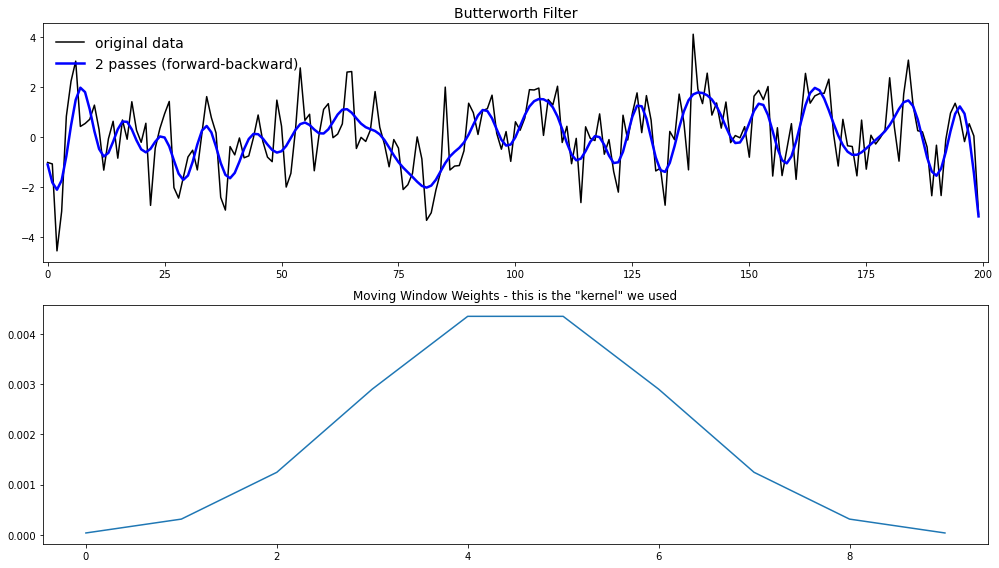

In [10]:
### Compare above to a recursive filter...

### Butterworth filter of actual data (recursive filter)
N = 9 ## order
Wn = 0.25 ## scalar given the critical frequency (all higher frequencies are removed)
## Note: Wn is normalized from 0 to 1, where 1 is the Nyquist frequency, pi radians/sample. 
## Note: (Wn is thus in half-cycles / sample.) 

b, a = sig.butter(N, Wn)
y = sig.filtfilt(b,a,xa) ## one filter forward, one filter backward - you are filtering twice

f=plt.figure(figsize=(14,8))
gs=GridSpec(2,1)
fig=plt.subplot(gs[0,0])
plt.plot(x,'-k',linewidth = 1.5, label = 'original data');
plt.plot(y,'-b',linewidth = 2.5, label = '2 passes (forward-backward)');
plt.title('Butterworth Filter',fontsize=14)
plt.legend(frameon = False,fontsize = 14,loc='upper left')
plt.xlim(-1,np.size(x)+1)
fig=plt.subplot(gs[1,0])
plt.plot(b);
plt.title('Moving Window Weights - this is the "kernel" we used')
f.tight_layout()